In [1]:
import cv2
import glob
import numpy as np
from PIL import Image
from PIL.ExifTags import TAGS
from datetime import datetime
import pickle


# **Single Camera Calibration**

In [2]:

def calibrate_camera(images_folder, row = 5, col = 7, scale= 4.5,show=False, error_threshold = 1.5):
    images_names = sorted(glob.glob(images_folder))
    
    #criteria used by checkerboard pattern detector.
    #Change this if the code can't find the checkerboard
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
    rows = row #number of checkerboard rows.
    columns = col #number of checkerboard columns.
    world_scaling = scale # real world square size.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp

        
    ideal = False
    unideal_images = {}
    
    while not ideal:
        
        i=0
        get = []
        
        images = []
        
        for imname in images_names:
            if imname not in unideal_images.keys():
                im = cv2.imread(imname, 1)
                images.append(im)
        
        #frame dimensions. Frames should be the same size.
        width = images[0].shape[1]
        height = images[0].shape[0]
        
        #Pixel coordinates of checkerboards
        imgpoints = [] # 2d points in image plane.
    
        #coordinates of the checkerboard in checkerboard world space.
        objpoints = [] # 3d point in real world space
            
        for frame in images:
            
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # detectChessboardflags = (cv2.CALIB_CB_ACCURACY  
            # + cv2.CALIB_CB_EXHAUSTIVE  
            # + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
            # ret, corners = cv2.findChessboardCornersSB(gray, (rows, columns), detectChessboardflags)

            flags = (cv2.CALIB_CB_ADAPTIVE_THRESH  
            + cv2.CALIB_CB_FAST_CHECK  
            + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
            #find the checkerboard
            ret, corners = cv2.findChessboardCorners(gray, (rows, columns), flags)
    
    
            if ret == True:
                get.append(images_names[i])
                #Convolution size used to improve corner detection. Don't make this too large.
                conv_size = (11, 11)
    
                #opencv can attempt to improve the checkerboard coordinates
                corners = cv2.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
                cv2.drawChessboardCorners(frame, (rows,columns), corners, ret)
                
                if show:
                    cv2.imshow('img', frame)
                    
                    if cv2.waitKey(0) & 0xFF == ord('q'):
                        show = False
                
                    
    
                objpoints.append(objp)
                imgpoints.append(corners)
            i += 1
    
        cv2.destroyAllWindows()

        
   
        yes =  cv2.calibrateCameraExtended(
            objpoints, 
            imgpoints, 
            (width, height), 
            None, 
            None,
            flags=cv2.CALIB_RATIONAL_MODEL
            )
        
        unideal_detected = False
        for j , error in enumerate(yes[-1]):
            if error >= error_threshold:
                unideal_detected = True
                unideal_images[get[j]] = error
        
        if not unideal_detected:
            ideal = True
    
    print('detected {n} :'.format(n=len(get)))        
    print("RMSE :", yes[0])
    e = 0
    for b in get:
        print(b,":",yes[-1][e])
        e +=1
    print("Unideal Images:")
    print(unideal_images)
        
    return yes
 


In [3]:
# mtx, dist = calibrate_camera(images_folder = './data/1/*')
yes1 = calibrate_camera(images_folder = './data/k2/m/mono/*')
mtx_m,dist_m = yes1[1],yes1[2]
print("Camera Matrix", mtx_m)
print("Distortion Matrix", dist_m)

detected 12 :
RMSE : 0.3188824467580522
./data/k2/m/mono\IMG_20230607_094327.jpg : [0.20524449]
./data/k2/m/mono\IMG_20230607_094331.jpg : [0.27293389]
./data/k2/m/mono\IMG_20230607_094335.jpg : [0.28384838]
./data/k2/m/mono\IMG_20230607_094339.jpg : [0.2854551]
./data/k2/m/mono\IMG_20230607_094343.jpg : [0.28295238]
./data/k2/m/mono\IMG_20230607_094347.jpg : [0.25115188]
./data/k2/m/mono\IMG_20230607_094352.jpg : [0.38606883]
./data/k2/m/mono\IMG_20230607_094356.jpg : [0.32903022]
./data/k2/m/mono\IMG_20230607_094410.jpg : [0.2408523]
./data/k2/m/mono\IMG_20230607_094414.jpg : [0.44509648]
./data/k2/m/mono\IMG_20230607_094420.jpg : [0.36061386]
./data/k2/m/mono\IMG_20230607_094424.jpg : [0.39363314]
Unideal Images:
{}
Camera Matrix [[1.43685473e+03 0.00000000e+00 9.51710378e+02]
 [0.00000000e+00 1.43760505e+03 5.48900808e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Matrix [[ 6.37019460e+00 -4.65764597e+01  2.20637978e-03 -1.16933464e-03
   1.38793941e+02  6.3895754

In [4]:
# mtx, dist = calibrate_camera(images_folder = './data/1/*')
yes1 = calibrate_camera(images_folder = './data/k2/j/mono/*')
mtx_j,dist_j = yes1[1],yes1[2]

print("Camera Matrix", mtx_j)
print("Distortion Matrix", dist_j)

detected 11 :
RMSE : 0.32320476934120806
./data/k2/j/mono\IMG_20230607_094158.jpg : [0.15537435]
./data/k2/j/mono\IMG_20230607_094204.jpg : [0.22222792]
./data/k2/j/mono\IMG_20230607_094209.jpg : [0.27134558]
./data/k2/j/mono\IMG_20230607_094217.jpg : [0.34550522]
./data/k2/j/mono\IMG_20230607_094222.jpg : [0.27669268]
./data/k2/j/mono\IMG_20230607_094229.jpg : [0.42221386]
./data/k2/j/mono\IMG_20230607_094238.jpg : [0.23270384]
./data/k2/j/mono\IMG_20230607_094247.jpg : [0.2104892]
./data/k2/j/mono\IMG_20230607_094253.jpg : [0.29108242]
./data/k2/j/mono\IMG_20230607_094304.jpg : [0.56894]
./data/k2/j/mono\IMG_20230607_094311.jpg : [0.34762619]
Unideal Images:
{}
Camera Matrix [[1.46608152e+03 0.00000000e+00 9.50072857e+02]
 [0.00000000e+00 1.46641766e+03 5.59930829e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Matrix [[ 3.55775029e-01  7.75774136e+01  4.72139577e-03  2.30246036e-03
  -1.54375973e+02  3.07368360e-02  7.75115988e+01 -1.53742124e+02
   0.00000000e+00  

In [5]:
# mtx, dist = calibrate_camera(images_folder = './data/1/*')
yes1 = calibrate_camera(images_folder = './data/k2/w/mono/*')
mtx_w,dist_w = yes1[1],yes1[2]

print("Camera Matrix", mtx_w)
print("Distortion Matrix", dist_w)

detected 9 :
RMSE : 0.4727283805356513
./data/k2/w/mono\IMG_20230607_094449.jpg : [0.28357556]
./data/k2/w/mono\IMG_20230607_094455.jpg : [0.62535427]
./data/k2/w/mono\IMG_20230607_094459.jpg : [0.37168421]
./data/k2/w/mono\IMG_20230607_094504.jpg : [0.40268635]
./data/k2/w/mono\IMG_20230607_094509.jpg : [0.40709992]
./data/k2/w/mono\IMG_20230607_094513.jpg : [0.77423412]
./data/k2/w/mono\IMG_20230607_094519.jpg : [0.34377641]
./data/k2/w/mono\IMG_20230607_094531.jpg : [0.35805278]
./data/k2/w/mono\IMG_20230607_094543.jpg : [0.47739685]
Unideal Images:
{}
Camera Matrix [[1.34638176e+03 0.00000000e+00 9.83342855e+02]
 [0.00000000e+00 1.34638338e+03 5.30830400e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Matrix [[-1.76354285e+01 -2.63732159e+01  3.62222957e-03  8.46199027e-04
   1.35311337e+03 -1.79418002e+01 -1.86496552e+01  1.30100598e+03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [6]:
def check_calibration(folder_name,mtx,dist):
    images_names = sorted(glob.glob(folder_name))
    images = []
    for imname in images_names:
        im = cv2.imread(imname, 1)

        height, width, channels = im.shape
        newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (width,height), 1, (width,height))
        dst = cv2.undistort(im, mtx, dist, None, newcameramtx)
        # # crop the image
        # x, y, w, h = roi
        # dst = dst[y:y+h, x:x+w]
        
        diff = np.concatenate((im, dst), axis=1)
        cv2.imshow('img', diff)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()


In [7]:
#check_calibration('./data/k2/m/mono/*',mtx_m,dist_m)

# **Stereo Calibration**

In [8]:
def get_images_by_date_taken(folder_name):
    files = sorted(glob.glob(folder_name))
    file_date = {}
    for im in files:
        image = Image.open(im)
        exifdata = image.getexif()

        meta = {}
        # iterating over all EXIF data fields
        for tag_id in exifdata:
            # # get the tag name, instead of human unreadable tag id
            tag = TAGS.get(tag_id, tag_id)
            data = exifdata.get(tag_id)
            # decode bytes 
            if isinstance(data, bytes):
                data = data.decode()
            meta[tag] = data
        file_date[im] = datetime.strptime(meta["DateTime"], "%Y:%m:%d %H:%M:%S")
    return [im for im, _ in sorted(file_date.items(), key=lambda x:x[1])]


In [9]:
def check_image_pair(folder1, folder2):
    c1_images_names = get_images_by_date_taken(folder1)
    c2_images_names = get_images_by_date_taken(folder2)
 
    c1_images = []
    c2_images = []
    for im1, im2 in zip(c1_images_names, c2_images_names):
        _im = cv2.imread(im1, 1)
        c1_images.append(_im)
 
        _im = cv2.imread(im2, 1)
        c2_images.append(_im)
      
    width = c1_images[0].shape[1]
    height = c1_images[0].shape[0]  
    
    i = 0

    for frame1, frame2 in zip(c1_images, c2_images):
        Sres = np.concatenate((frame1, frame2), axis=1)
        
        text = str(i+1) + ' | Camera 1 : ' + str(c1_images_names[i])
        cv2.putText(Sres, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255,255,0), 2, cv2.LINE_AA)
        
        text = str(i+1) + ' | Camera 2 : ' + str(c2_images_names[i])
        cv2.putText(Sres, text, (width+50,50), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255,255,0), 2, cv2.LINE_AA)
        

        cv2.imshow('Sres', Sres)
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        i += 1
    cv2.destroyAllWindows()


In [10]:
#check_image_pair('./data/k/j/stereo1/*','./data/k/m/stereo1/*')

In [11]:
#check_image_pair('./data/k/j/stereo2/*','./data/k/w/stereo2/*')

In [12]:
#check_image_pair('./data/k/m/stereo3/*','./data/k/w/stereo3/*')

In [13]:

def stereo_calibrate(mtx1, dist1, mtx2, dist2, folder1, folder2, show=False, error_threshold = 1.5):
    #read the synched frames
    c1_images_names = get_images_by_date_taken(folder1)
    c2_images_names = get_images_by_date_taken(folder2)
 
    #change this if stereo calibration not good.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
 
    rows = 5 #number of checkerboard rows.
    columns = 7 #number of checkerboard columns.
    world_scaling = 4.5 # real world square size.
 
    #coordinates of squares in the checkerboard world space
    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp
 

    ideal = False
    unideal_images = {}
    
    while not ideal:
        
        get = []
        i = 0
        
        
        c1_images = []
        c2_images = []

        for im1, im2 in zip(c1_images_names, c2_images_names):
            if tuple([im1,im2]) not in unideal_images.keys():

                _im = cv2.imread(im1, 1)
                c1_images.append(_im)
        
                _im = cv2.imread(im2, 1)
                c2_images.append(_im)

        if c1_images == [] or c2_images == []:
            print("Calibration Failed! Error Threshold Too Low!")
            break
        
        #frame dimensions. Frames should be the same size.
        width = c1_images[0].shape[1]
        height = c1_images[0].shape[0]
    
        #Pixel coordinates of checkerboards
        imgpoints_left = [] # 2d points in image plane.
        imgpoints_right = []
    
        #coordinates of the checkerboard in checkerboard world space.
        objpoints = [] # 3d point in real world space
    
   
    
        for frame1, frame2 in zip(c1_images, c2_images):
            gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
            gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
                      
            detectChessboardflags = (cv2.CALIB_CB_ACCURACY  
            + cv2.CALIB_CB_EXHAUSTIVE  
            + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
            c_ret1, corners1 = cv2.findChessboardCornersSB(gray1, (rows, columns), detectChessboardflags)
            c_ret2, corners2 = cv2.findChessboardCornersSB(gray2, (rows, columns), detectChessboardflags)
    
    
            if c_ret1 == True and c_ret2 == True:
                get.append([c1_images_names[i],c2_images_names[i]])
                corners1 = cv2.cornerSubPix(gray1, corners1, (11, 11), (-1, -1), criteria)
                corners2 = cv2.cornerSubPix(gray2, corners2, (11, 11), (-1, -1), criteria)
    
                cv2.drawChessboardCorners(frame1, (rows, columns), corners1, c_ret1)
                
    
                cv2.drawChessboardCorners(frame2, (rows, columns), corners2, c_ret2)
                
                
                Sres = np.concatenate((frame1, frame2), axis=1)
                text = str(i+1) + ' | Camera 1 : ' + str(c1_images_names[i])
                cv2.putText(Sres, text, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (255,255,0), 2, cv2.LINE_AA)
                
                text = str(i+1) + ' | Camera 2 : ' + str(c2_images_names[i])
                cv2.putText(Sres, text, (width+50,50), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (255,255,0), 2, cv2.LINE_AA)
                
                if show:
                    cv2.imshow('Sres', Sres)
                    if cv2.waitKey(0) & 0xFF == ord('q'):
                        show = False
                        cv2.destroyAllWindows()
                
    
                objpoints.append(objp)
                imgpoints_left.append(corners1)
                imgpoints_right.append(corners2)

            i += 1
                
        
        cv2.destroyAllWindows()
        stereocalibration_flags = cv2.CALIB_FIX_INTRINSIC + cv2.CALIB_RATIONAL_MODEL

        ret, CM1, dist1, CM2, dist2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, mtx1, dist1,
                                                                    mtx2, dist2, (width, height), criteria = criteria, flags = stereocalibration_flags)

        yes_flags = cv2.CALIB_FIX_INTRINSIC + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_USE_EXTRINSIC_GUESS
        yes = cv2.stereoCalibrateExtended(objpoints, imgpoints_left, imgpoints_right, mtx1, dist1,
                                                                    mtx2, dist2, (width, height), R, T, criteria = criteria, flags = yes_flags)
        
        unideal_detected = False
        for j , error in enumerate(yes[-1]):
            if error[0] >= error_threshold or error[1] >= error_threshold:
                unideal_detected = True
                unideal_images[tuple(get[j])] = error
        
        if not unideal_detected:
            ideal = True
        

    print("RMSE :",ret)
    print('detected {n} :'.format(n=len(get)))     
    for k in range(len(get)):
        print("Iter :", k+1)
        print("1st Camera :",get[k][0],"Error :",yes[-1][k][0])
        print("2nd Camera :",get[k][1],"Error :",yes[-1][k][1])
        print()
        
    print("Unideal Images:")
    print(unideal_images)
        
    
    return R, T
    

In [14]:
R1, T1 = stereo_calibrate(mtx_j, dist_j, mtx_m, dist_j, './data/k2/j/s1/*','./data/k2/m/s1/*',show=False, error_threshold=5)
R1, T1

RMSE : 0.44546777617040606
detected 3 :
Iter : 1
1st Camera : ./data/k2/j/s1\IMG_tes1_44.jpg Error : 0.22567679860488118
2nd Camera : ./data/k2/m/s1\IMG_tes1_46.jpg Error : 0.40558930964762563

Iter : 2
1st Camera : ./data/k2/j/s1\IMG_tes1_45.jpg Error : 0.4228677471603839
2nd Camera : ./data/k2/m/s1\IMG_tes1_47.jpg Error : 0.5237947008892271

Iter : 3
1st Camera : ./data/k2/j/s1\IMG_tes1_46.jpg Error : 0.44041712511882397
2nd Camera : ./data/k2/m/s1\IMG_tes1_48.jpg Error : 0.5727780707506976

Unideal Images:
{('./data/k2/j/s1\\IMG_tes1_44.jpg', './data/k2/m/s1\\IMG_tes1_46.jpg'): array([9.35636204, 7.73232512]), ('./data/k2/j/s1\\IMG_tes1_45.jpg', './data/k2/m/s1\\IMG_tes1_47.jpg'): array([7.33091636, 5.62185626])}


(array([[ 0.61724949,  0.0448802 , -0.78548637],
        [-0.11362484,  0.99299031, -0.03255215],
        [ 0.7785194 ,  0.10934356,  0.61802227]]),
 array([[216.9148059 ],
        [ 11.82382883],
        [ 59.76614793]]))

In [15]:
R2, T2 = stereo_calibrate(mtx_j, dist_j, mtx_w, dist_w, './data/k2/j/s2/*','./data/k2/w/s2/*',show=False, error_threshold=20)
R2, T2

RMSE : 0.25648966680640595
detected 4 :
Iter : 1
1st Camera : ./data/k2/j/s2\IMG_tes2_68.jpg Error : 0.22538565689191603
2nd Camera : ./data/k2/w/s2\IMG_tes2_56.jpg Error : 0.25446641995063185

Iter : 2
1st Camera : ./data/k2/j/s2\IMG_tes2_69.jpg Error : 0.2542171205845656
2nd Camera : ./data/k2/w/s2\IMG_tes2_57.jpg Error : 0.34432842265052116

Iter : 3
1st Camera : ./data/k2/j/s2\IMG_tes2_70.jpg Error : 0.2188578871001205
2nd Camera : ./data/k2/w/s2\IMG_tes2_58.jpg Error : 0.22228127676839368

Iter : 4
1st Camera : ./data/k2/j/s2\IMG_tes2_71.jpg Error : 0.25810645594814574
2nd Camera : ./data/k2/w/s2\IMG_tes2_59.jpg Error : 0.2522472314520158

Unideal Images:
{('./data/k2/j/s2\\IMG_tes2_70.jpg', './data/k2/w/s2\\IMG_tes2_58.jpg'): array([55.2793323 , 47.49814715])}


(array([[ 0.69847834, -0.0650437 ,  0.71266916],
        [-0.03464933,  0.99161917,  0.12446222],
        [-0.71479188, -0.11162767,  0.69037079]]),
 array([[-188.55911886],
        [  -2.19980946],
        [  25.71662066]]))

In [16]:
R3, T3 = stereo_calibrate(mtx_m, dist_m, mtx_w, dist_w, './data/k2/m/s3/*','./data/k2/w/s3/*',show=False, error_threshold=20)
R3, T3

RMSE : 0.9799609919322902
detected 5 :
Iter : 1
1st Camera : ./data/k2/m/s3\IMG_tes3_64.jpg Error : 0.5754259008249973
2nd Camera : ./data/k2/w/s3\IMG_tes3_95.jpg Error : 0.4676996408965629

Iter : 2
1st Camera : ./data/k2/m/s3\IMG_tes3_65.jpg Error : 1.2223209767417973
2nd Camera : ./data/k2/w/s3\IMG_tes3_96.jpg Error : 0.7742717640223705

Iter : 3
1st Camera : ./data/k2/m/s3\IMG_tes3_66.jpg Error : 1.179724139392363
2nd Camera : ./data/k2/w/s3\IMG_tes3_97.jpg Error : 1.3657334080499834

Iter : 4
1st Camera : ./data/k2/m/s3\IMG_tes3_67.jpg Error : 0.7028634209200433
2nd Camera : ./data/k2/w/s3\IMG_tes3_98.jpg Error : 1.0220550505460444

Iter : 5
1st Camera : ./data/k2/m/s3\IMG_tes3_68.jpg Error : 1.0827277410215057
2nd Camera : ./data/k2/w/s3\IMG_tes3_99.jpg Error : 0.9959530233934887

Unideal Images:
{}


(array([[-0.12684322, -0.15145389,  0.98029206],
        [-0.07183289,  0.98708228,  0.14320828],
        [-0.98931837, -0.05225222, -0.13608407]]),
 array([[-213.63339827],
        [  -2.87245826],
        [ 247.53977301]]))

In [17]:
print(cv2.Rodrigues(R1)[0] / np.pi *180)
print(cv2.Rodrigues(R2)[0] / np.pi *180)
print(cv2.Rodrigues(R3)[0] / np.pi *180)

[[  4.68469129]
 [-51.6356982 ]
 [ -5.23304889]]
[[-7.56170288]
 [45.72002746]
 [ 0.97349884]]
[[-9.6628408 ]
 [97.37022336]
 [ 3.93616647]]


In [18]:
np.linalg.norm(T1)

225.30829630614684

# **Triangulation**

In [46]:
RT_C = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
P_C = mtx_j @ RT_C

RT_L = np.concatenate([R1, T1], axis = -1)
P_L = mtx_m @ RT_L

RT_R = np.concatenate([R2, T2], axis = -1)
P_R = mtx_w @ RT_R
  
    

In [19]:
def triangulate(mtx1, mtx2, R1, T1, R2, T2, uvs1, uvs2):
 
    uvs1 = np.array(uvs1)
    uvs2 = np.array(uvs2)
    
    if R1 is None:
        #RT matrix for C1 is identity.
        RT1 = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
        P1 = mtx1 @ RT1 #projection matrix for C1
    else:
        RT1 = np.concatenate([R1, T1], axis = -1)
        P1 = mtx1 @ RT1 #projection matrix for C1
    
    #RT matrix for C2 is the R and T obtained from stereo calibration.
    RT2 = np.concatenate([R2, T2], axis = -1)
    P2 = mtx2 @ RT2 #projection matrix for C2
 
    def DLT(P1, P2, point1, point2):
 
        A = [point1[1]*P1[2,:] - P1[1,:],
             P1[0,:] - point1[0]*P1[2,:],
             point2[1]*P2[2,:] - P2[1,:],
             P2[0,:] - point2[0]*P2[2,:]
            ]
        A = np.array(A).reshape((4,4))

        B = A.transpose() @ A
        from scipy import linalg
        U, s, Vh = linalg.svd(B, full_matrices = False)
 
        return Vh[3,0:3]/Vh[3,3]
 
    p3ds = []
    for uv1, uv2 in zip(uvs1, uvs2):
        _p3d = DLT(P1, P2, uv1, uv2)
        p3ds.append(_p3d)
    p3ds = np.array(p3ds)
 
    return p3ds


In [27]:
def triangulate3(uvs1, P1, uvs2, P2, uvs3, P3):
 
    uvs1 = np.array(uvs1)
    uvs2 = np.array(uvs2)
    uvs3 = np.array(uvs3)

 
    def DLT(P1, P2, P3, point1, point2, point3):
 
        A = [# Camera 1
            point1[0]*P1[2,:] - P1[0,:],
            point1[1]*P1[2,:] - P1[1,:],
             
             # Camera 2
            point2[0]*P2[2,:] - P2[0,:],
            point2[1]*P2[2,:] - P2[1,:],
            
            # Camera 3
            point3[0]*P3[2,:] - P3[0,:],
            point3[1]*P3[2,:] - P3[1,:]
            ]
        A = np.array(A).reshape((6,4))
        
        from scipy import linalg
        U, s, Vh = linalg.svd(A, full_matrices = False)

        return Vh[3,0:3]/Vh[3,3]
 
    p3ds = []
    for uv1, uv2, uv3 in zip(uvs1, uvs2, uvs3):
        _p3d = DLT(P1, P2, P3, uv1, uv2, uv3)
        p3ds.append(_p3d)
    p3ds = np.array(p3ds)
 
    return p3ds

In [20]:
def project_back(image, p3ds, camera_index, show=False):


    _im = cv2.imread(image, 1)

    if camera_index == 'l':
        imgp, _ = cv2.projectPoints(p3ds, R1, T1, mtx_m, dist_m)
    elif camera_index == 'c':
        imgp, _ = cv2.projectPoints(p3ds, np.eye(3), np.zeros(3), mtx_j, dist_j)
    elif camera_index == 'r':
        imgp, _ = cv2.projectPoints(p3ds, R2, T2, mtx_w, dist_w)
        
        
    imgp = np.squeeze(imgp)
    
    if show :     
        for c in imgp:
            cv2.circle(_im, (int(c[0]),int(c[1])), 
                    radius=3, color=(255,255,0), thickness=-1)
        cv2.imshow('img', _im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    

In [45]:
def total_mean_reprojection_error( p3ds, p2d_l,p2d_c,p2d_r):

    total_error = 0
    n = 0
    if p2d_l != [-1,-1]:
        imgp, _ = cv2.projectPoints(p3ds, R1, T1, mtx_m, dist_m)
        p2d_l = np.array(p2d_l)
        
        total_error += cv2.norm(np.squeeze(imgp), p2d_l, cv2.NORM_L2)
        n += 1
        
    if p2d_c != [-1,-1]:
        imgp, _ = cv2.projectPoints(p3ds, np.eye(3), np.zeros(3), mtx_j, dist_j)
        p2d_c = np.array(p2d_c)
        
        total_error += cv2.norm(np.squeeze(imgp), p2d_c, cv2.NORM_L2)
        n += 1
        
    if p2d_r != [-1,-1]:
        imgp, _ = cv2.projectPoints(p3ds, R2, T2, mtx_w, dist_w)
        p2d_r = np.array(p2d_r)
        
        total_error += cv2.norm(np.squeeze(imgp), p2d_r, cv2.NORM_L2)

        n += 1

    
    return total_error/n
    

In [52]:

def triangulate_pickle(pickle_file,output_file, main_stereo_camera = None, dump_pickle = True):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    
    output_data = {}
    for frame,bodyparts in data.items():
        points3d = {}
        for bodypart,cameras in bodyparts.items():

            # Double Null Check
            null_count = 0
            for camera_index in cameras:
                if cameras[camera_index] == [-1,-1]:
                    null_count += 1
            if null_count >= 2:
                p3d = [-1,-1,-1]
            elif null_count == 0:
                if main_stereo_camera == 'cl' :
                    p3d = triangulate(mtx_j,mtx_m,None,None,R1,T1,
                                                 np.expand_dims(cameras['c'], axis=0),
                                                 np.expand_dims(cameras['l'], axis=0))
                elif main_stereo_camera == 'cr' :
                    p3d = triangulate(mtx_j,mtx_w,None,None,R2,T2,
                                                     np.expand_dims(cameras['c'], axis=0),
                                                     np.expand_dims(cameras['r'], axis=0)) 
                elif main_stereo_camera == 'lr' :
                    p3d = triangulate(mtx_m,mtx_w,R1,T1,R2,T2,
                                                        np.expand_dims(cameras['l'], axis=0),
                                                        np.expand_dims(cameras['r'], axis=0))
                elif main_stereo_camera == 'e3' :
                    p3d = triangulate3(np.expand_dims(cameras['c'], axis=0), P_C,
                                        np.expand_dims(cameras['l'], axis=0), P_L,
                                        np.expand_dims(cameras['r'], axis=0), P_R) 
                    
                else: 
                    candidate_cl = triangulate(mtx_j,mtx_m,None,None,R1,T1,
                                                    np.expand_dims(cameras['c'], axis=0),
                                                    np.expand_dims(cameras['l'], axis=0))
                    
                    candidate_cr = triangulate(mtx_j,mtx_w,None,None,R2,T2,
                                                        np.expand_dims(cameras['c'], axis=0),
                                                        np.expand_dims(cameras['r'], axis=0)) 
                    
                    candidate_lr = triangulate(mtx_m,mtx_w,R1,T1,R2,T2,
                                                        np.expand_dims(cameras['l'], axis=0),
                                                        np.expand_dims(cameras['r'], axis=0))
                    
                    candidate_e3 = triangulate3(np.expand_dims(cameras['c'], axis=0), P_C,
                                        np.expand_dims(cameras['l'], axis=0), P_L,
                                        np.expand_dims(cameras['r'], axis=0), P_R)
                    
                    error_cl = total_mean_reprojection_error(candidate_cl, cameras['l'], cameras['c'], cameras['r'])
                    error_cr = total_mean_reprojection_error(candidate_cr, cameras['l'], cameras['c'], cameras['r'])
                    error_lr = total_mean_reprojection_error(candidate_lr, cameras['l'], cameras['c'], cameras['r'])
                    error_e3 = total_mean_reprojection_error(candidate_e3, cameras['l'], cameras['c'], cameras['r'])
                    
                    candidates = [candidate_cl,candidate_cr,candidate_lr,candidate_e3]
                    index_min_error = np.argmin([error_cl,error_cr,error_lr,error_e3])
                    p3d = candidates[index_min_error]

            else:
                if cameras['c'] == [-1,-1]:
                    p3d = triangulate(mtx_m,mtx_w,R1,T1,R2,T2,
                                                     np.expand_dims(cameras['l'], axis=0),
                                                     np.expand_dims(cameras['r'], axis=0))
                     
                elif cameras['r'] == [-1,-1]:
                    p3d = triangulate(mtx_j,mtx_m,None,None,R1,T1,
                                                     np.expand_dims(cameras['c'], axis=0),
                                                     np.expand_dims(cameras['l'], axis=0))
                     
                elif cameras['l'] == [-1,-1]:
                    p3d = triangulate(mtx_j,mtx_w,None,None,R2,T2,
                                                     np.expand_dims(cameras['c'], axis=0),
                                                     np.expand_dims(cameras['r'], axis=0))
                    
            points3d[bodypart] = np.squeeze(p3d)
        output_data[frame] = points3d
        

    
    if dump_pickle:
        with open(output_file, 'wb') as handle:
            pickle.dump(output_data, handle, protocol=pickle.HIGHEST_PROTOCOL)         
   
    return output_data


# **Test Data**

In [23]:
outfile = './output/output3dPickle2'
infile = './input/outputPickle2'
outdata = triangulate_pickle(infile,outfile,False)
outdata[2]

{'kuning kehijauan': array([  7.54725453,  23.33199216, 191.19208505]),
 'hijau tua': array([  5.27305112,   3.25219499, 189.81124943]),
 'biru muda': array([ 15.42837791, -15.18624798, 183.82337897]),
 'biru telur unta': array([ 32.89064007,  26.24098962, 166.5791425 ]),
 'oranye': array([ 34.56567992, -12.2898677 , 167.28162662]),
 'ungu': array([ 36.96390779,   8.39318259, 159.92352127])}

In [49]:
outfile = './output/output3dPickle2'
infile = './input/outputPickle2'
outdata_2 = triangulate_pickle(infile,outfile,False)
outdata_2[2]

{'kuning kehijauan': array([  6.84592319,  13.01270169, 193.33798794]),
 'hijau tua': array([  4.17644966,  -8.26563377, 187.81049184]),
 'biru muda': array([ 20.13970009, -27.05241321, 185.55346651]),
 'biru telur unta': array([ 44.96658612,   1.26570192, 201.5704317 ]),
 'oranye': array([ 43.42215301, -35.56000587, 194.51053892]),
 'ungu': array([ 36.96390779,   8.39318259, 159.92352127])}

In [24]:
# outfile = './output/output3dPickle2_2'
# infile = './input/outputPickle2_2'
# _ = triangulate_pickle(infile,outfile,True)

# outfile = './output/output3dPickle2_3'
# infile = './input/outputPickle2_3'
# _ = triangulate_pickle(infile,outfile,True)


In [25]:
with open(infile, 'rb') as file:
    data = pickle.load(file)

indata = data[2]['kuning kehijauan']  
indata

{'c': [1034.2050000000002, 645.405],
 'l': [1510.9050000000002, 863.505],
 'r': [600.905, 628.205]}

In [28]:
u1 = np.array(indata['c'])
u2 = np.array(indata['l'])
u3 = np.array(indata['r'])

u1 = np.reshape(u1, (1,2))
u2 = np.reshape(u2, (1,2))
u3 = np.reshape(u2, (1,2))

print(triangulate3(u1,P_C,u2,P_L,u3,P_R))
print(outdata[2]['kuning kehijauan']  )

[[ 53.22382941  28.4812543  240.49200102]]
[  7.54725453  23.33199216 191.19208505]


In [44]:
total_mean_reprojection_error(outdata[2]['kuning kehijauan'],indata['l'],indata['c'],indata['r'])

97.63956173608504
98.22662323165052
320.24082615632227
516.1070111240579


172.03567037468596

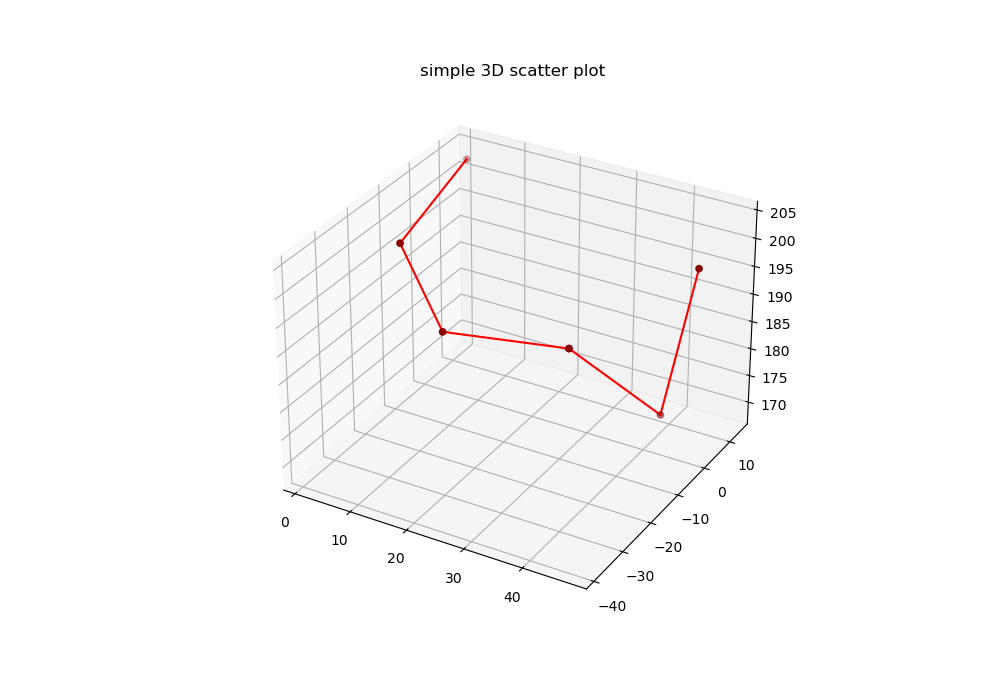

In [50]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
plt.title("simple 3D scatter plot")

connection = [['kuning kehijauan','hijau tua'],
              ['hijau tua','biru muda'],
              ['biru muda','oranye'],
              ['oranye','ungu'],
              ['ungu','biru telur unta']]

for c in connection:
    p3ds = outdata_2[377]
    xs = [p3ds[c[0]][0],p3ds[c[1]][0]]
    ys = [p3ds[c[0]][1],p3ds[c[1]][1]]
    zs = [p3ds[c[0]][2],p3ds[c[1]][2]]
    ax.scatter3D(xs, ys, zs, c = "darkred")
    ax.plot(xs, ys, zs, c = "red")


plt.show()


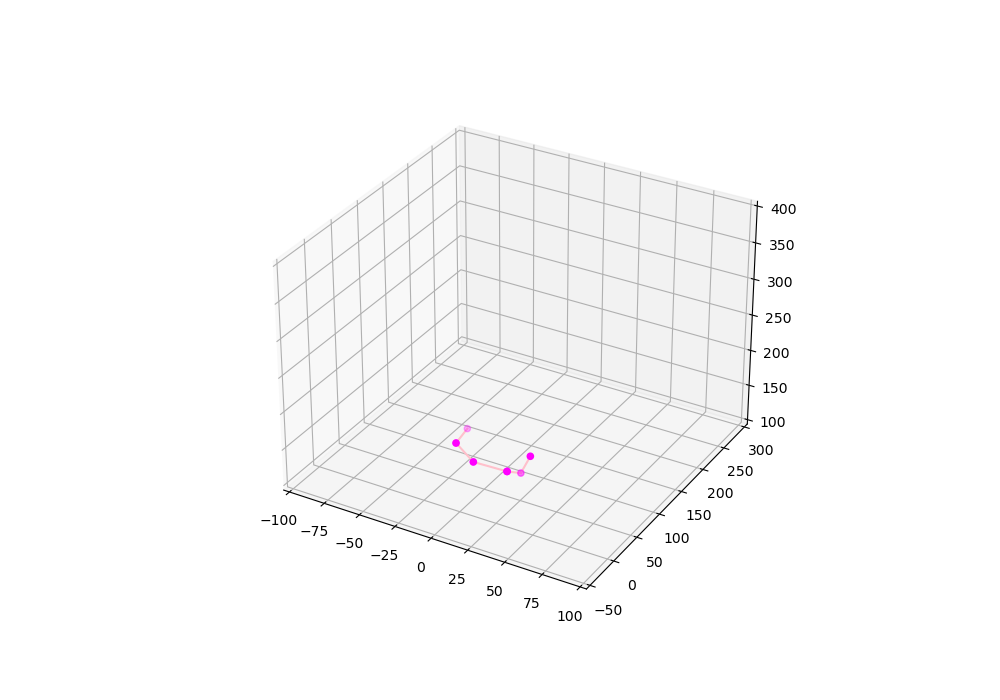

In [51]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")



plt.title("Animation")


connection = [['kuning kehijauan','hijau tua'],
              ['hijau tua','biru muda'],
              ['biru muda','oranye'],
              ['oranye','ungu'],
              ['ungu','biru telur unta']]

def init_func():
    ax.clear()

def updatefig(i):
    ax.clear()
    ax.set_xlim3d(-100, 100)
    ax.set_ylim3d(-50, 300)
    ax.set_zlim3d(100, 400)
       
    for c in connection:
        p3ds = outdata_2[i+1]
        xs = [p3ds[c[0]][0],p3ds[c[1]][0]]
        ys = [p3ds[c[0]][1],p3ds[c[1]][1]]
        zs = [p3ds[c[0]][2],p3ds[c[1]][2]]
        ax.scatter3D(xs, ys, zs, c = "magenta")
        ax.plot(xs, ys, zs, c = "pink")


anim = animation.FuncAnimation(fig, updatefig, 377,init_func=init_func)
anim.save("./output/k2_3_3.mp4",fps = 15)

# **Additional Evaluation**

In [20]:

def get_chessboard_coordinate(image,row = 5, col = 7, scale= 4.5, show=True):

    _im = cv2.imread(image, 1)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)

    rows = row 
    columns = col 
    world_scaling = scale 

    objp = np.zeros((rows*columns,3), np.float32)
    objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
    objp = world_scaling* objp


    width = _im.shape[1]
    height = _im.shape[0]

    #Pixel coordinates of checkerboards
    imgpoints = [] # 2d points in image plane.


    #coordinates of the checkerboard in checkerboard world space.
    objpoints = [] # 3d point in real world space
   
    gray = cv2.cvtColor(_im, cv2.COLOR_BGR2GRAY)

    detectChessboardflags = (cv2.CALIB_CB_ACCURACY  
    + cv2.CALIB_CB_EXHAUSTIVE  
    + cv2.CALIB_CB_NORMALIZE_IMAGE)

    c_ret, corners = cv2.findChessboardCornersSB(gray, (rows, columns), detectChessboardflags)

    if c_ret == True :

        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        cv2.drawChessboardCorners(_im, (rows, columns), corners, c_ret)      
        
        if show:
            cv2.imshow('img', _im)
        cv2.waitKey(0)
        

        objpoints.append(objp)
        imgpoints.append(corners)

    cv2.destroyAllWindows()
    
    return np.squeeze(imgpoints)


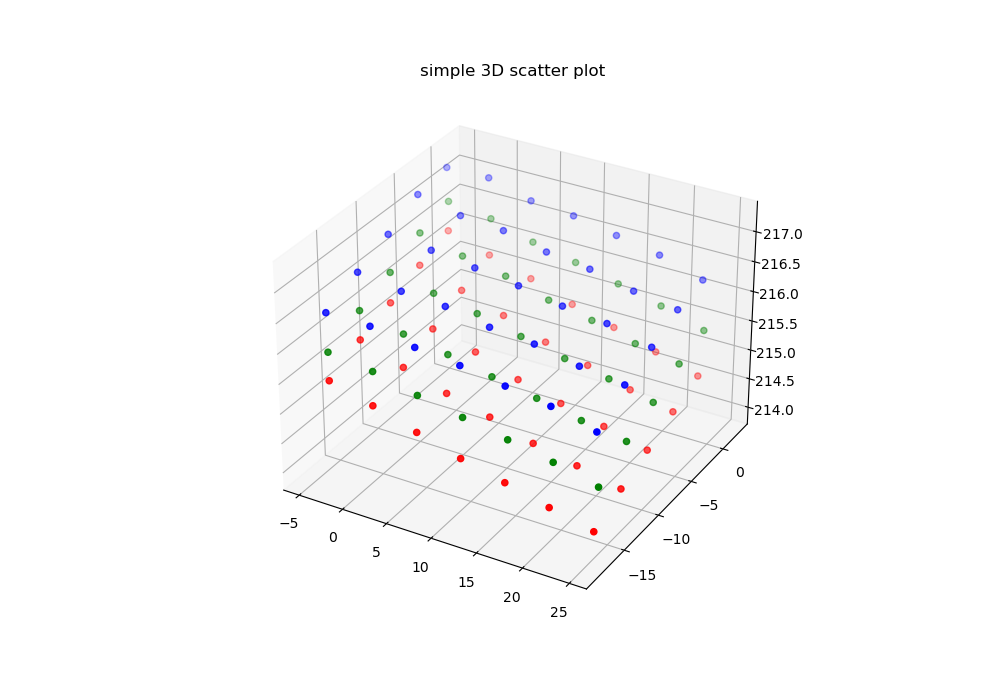

In [56]:
# Import libraries
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
plt.title("simple 3D scatter plot")

usv_c = get_chessboard_coordinate('./data/k/j/tritest/calboard.jpg',show=False)
usv_l = get_chessboard_coordinate('./data/k/m/tritest/calboard.jpg',show=False)
usv_r = get_chessboard_coordinate('./data/k/w/tritest/calboard.jpg',show=False)

p3ds_cl = triangulate(mtx_j,mtx_m,None,None,R1,T1,usv_c,usv_l)
p3ds_cr = triangulate(mtx_j,mtx_w,None,None,R2,T2,usv_c,usv_r)
p3ds_lr = triangulate(mtx_m,mtx_w,R1,T1,R2,T2,usv_l,usv_r)

x = p3ds_cl[:,0]
y = p3ds_cl[:,1]
z = p3ds_cl[:,2]
ax.scatter3D(x, y, z, color = "red")

x = p3ds_cr[:,0]
y = p3ds_cr[:,1]
z = p3ds_cr[:,2]
ax.scatter3D(x, y, z, color = "blue")

x = p3ds_lr[:,0]
y = p3ds_lr[:,1]
z = p3ds_lr[:,2]
ax.scatter3D(x, y, z, color = "green")

#plt.show()


In [53]:
print(np.linalg.norm(p3ds_cl[0]-p3ds_cl[1]))
print(np.linalg.norm(p3ds_cr[0]-p3ds_cr[1]))
print(np.linalg.norm(p3ds_lr[0]-p3ds_lr[1]))
print(np.linalg.norm(p3ds_cl[0]-p3ds_cr[0]))
print(np.linalg.norm(p3ds_cr[0]-p3ds_lr[0]))
print(np.linalg.norm(p3ds_cl[0]-p3ds_lr[0]))

4.527597411278261
4.512336481051278
4.549887493292189
1.0809475786200735
0.7433814116924612
0.7673242804741763


In [80]:

np.squeeze([-1,-1,-1])

array([-1, -1, -1])

In [33]:
# usv_c = reproject_back('./data/k/j/tritest/calboard.jpg',p3ds_cl,'c')
# usv_c = reproject_back('./data/k/j/tritest/calboard.jpg',p3ds_cr,'c')
# usv_c = reproject_back('./data/k/j/tritest/calboard.jpg',p3ds_lr,'c')
# usv_l = reproject_back('./data/k/m/tritest/calboard.jpg',p3ds_cl,'l')
# usv_r = reproject_back('./data/k/w/tritest/calboard.jpg',p3ds_lr,'r')


In [ ]:
import numpy as np
import cv2

def get_centerpoints(img,lh=28,ls=20,lv=20,uh=160,us=255,uv=255):
    # Define Trackbar On Change Value
    def do_nothing(x):
        pass

    # Init Empty Black Image To Describe Lower limit and Upper limit for Color Detection
    L_img = np.zeros((480, 640, 3), np.uint8)
    U_img = np.zeros((480, 640, 3), np.uint8)

    # Init Windows
    cv2.namedWindow("Res",cv2.WINDOW_NORMAL)
    cv2.namedWindow("HSV Control",cv2.WINDOW_NORMAL)

    # Init Trackbar for Setting Lower Limit and Upper Limit Of HSV Detection
    cv2.createTrackbar("Lower Hue","HSV Control"        ,lh,179,do_nothing)
    cv2.createTrackbar("Lower Saturation","HSV Control" ,ls,255,do_nothing)
    cv2.createTrackbar("Lower Value","HSV Control"      ,lv,255,do_nothing)
    cv2.createTrackbar("Upper Hue","HSV Control"        ,uh,179,do_nothing)
    cv2.createTrackbar("Upper Saturation","HSV Control" ,us,255,do_nothing)
    cv2.createTrackbar("Upper Value","HSV Control"      ,uv,255,do_nothing)

    # Define Windows Initial Position
    cv2.moveWindow("Res",50,100)
    cv2.moveWindow("HSV Control",475,100)

    # Read Stream
    while(1):
        
        imageFrame = cv2.imread(img)   
    
        
        # Assign Trackbar value to variable
        L_H = cv2.getTrackbarPos("Lower Hue","HSV Control")
        L_S = cv2.getTrackbarPos("Lower Saturation","HSV Control")
        L_V = cv2.getTrackbarPos("Lower Value","HSV Control")    
        
        U_H = cv2.getTrackbarPos("Upper Hue","HSV Control")
        U_S = cv2.getTrackbarPos("Upper Saturation","HSV Control")
        U_V = cv2.getTrackbarPos("Upper Value","HSV Control")
        
        # Assert Boundaries
        if L_H > U_H:
            L_H = U_H
        if L_S > U_S:
            L_S = U_S
        if L_V > U_V:
            L_V = U_V
            
            
        L_limit=np.array([L_H,L_S,L_V]) # setting the lower limit
        U_limit=np.array([U_H,U_S,U_V]) # setting the upper limit
            
        # Convert Image To HSV
        into_hsv =cv2.cvtColor(imageFrame,cv2.COLOR_BGR2HSV)
        
        # Blur to reduce Noise
        into_hsv = cv2.blur(into_hsv,(7,7))
        
        # Create Mask
        b_mask=cv2.inRange(into_hsv,L_limit,U_limit)
        
        
        # Reduce Mask Splitting on same region
        kernel = np.ones((5, 5), np.uint8)
        b_mask = cv2.dilate(b_mask, kernel, iterations=3)

        # creating the mask using inRange() function
        # this will produce an image where the color of the objects
        # falling in the range will turn white and rest will be black
        #imageFrame=cv2.bitwise_and(imageFrame,imageFrame,mask=fgmask)
        
        blue=cv2.bitwise_and(imageFrame,imageFrame,mask=b_mask)
        
        
        L_img[:] = [L_H,L_S,L_V]
        U_img[:] = [U_H,U_S,U_V]
        L_img = cv2.cvtColor(L_img,cv2.COLOR_HSV2BGR)
        U_img = cv2.cvtColor(U_img,cv2.COLOR_HSV2BGR)
        outputControl = np.concatenate((L_img,U_img),axis=1)
        
        contours, hierarchy = cv2.findContours(b_mask,
                                            cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
        centerpoints = []
        for pic, contour in enumerate(contours):
            area = cv2.contourArea(contour)
            if(area > 300):
                x, y, w, h = cv2.boundingRect(contour)
                imageFrame = cv2.rectangle(imageFrame, (x, y),
                                        (x + w, y + h),
                                        (255, 0, 0), 2)
                centerpoint = (x + w//2, y + h//2)
                centerpoints.append(centerpoint)
                # cv2.circle(imageFrame, centerpoint, 
                #         radius=3, color=(255,255,0), thickness=-1)
                cv2.putText(imageFrame, "Detected Object", (x, y),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0, (255, 0, 0))
        outputFrame = np.concatenate((imageFrame,blue),axis=1)
        
        
        cv2.imshow("Res", outputFrame)
        cv2.imshow("HSV Control",outputControl)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    return centerpoints


In [ ]:
cc_1 = get_centerpoints('./data/triangulate/1/IMG_20230428_150246.jpg',10,110,160,160,255,225)
cc_2 = get_centerpoints('./data/triangulate/2/IMG_20230428_150245.jpg',23,120,125)
cc_1,cc_2

([(1535, 569), (1465, 558), (1343, 538), (1200, 518)],
 [(658, 573), (722, 570), (946, 561), (818, 563)])

In [ ]:
imageFrame = cv2.imread('./data/triangulate/1/IMG_20230428_150246.jpg')  
i=1
for c in cc_1:
    cv2.putText(imageFrame, str(i), c,
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0, (255, 0, 0))
    cv2.circle(imageFrame, c, 
        radius=3, color=(255,255,0), thickness=-1)
    i += 1
cv2.imshow('img', imageFrame)
cv2.waitKey(0)
cv2.destroyAllWindows()
i=1
imageFrame = cv2.imread('./data/triangulate/2/IMG_20230428_150245.jpg')  
for c in cc_2:
    cv2.putText(imageFrame, str(i), c,
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0, (255, 0, 0))
    
    cv2.circle(imageFrame, c, 
        radius=3, color=(255,255,0), thickness=-1)
    i+=1
cv2.imshow('img', imageFrame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cc_2[3], cc_2[2] = cc_2[2] , cc_2[3]

In [ ]:
PC = triangulate(mtx1,mtx2,R,T,cc_1,cc_2)
PC

Triangulated point: 
[365.43412575  23.68523481 923.34393261]
Triangulated point: 
[338.08346508  16.97533101 974.05555972]
Triangulated point: 
[ 277.97426509    3.10976788 1059.986938  ]
Triangulated point: 
[ 194.24253528  -12.7618975  1193.36846385]


array([[ 365.43412575,   23.68523481,  923.34393261],
       [ 338.08346508,   16.97533101,  974.05555972],
       [ 277.97426509,    3.10976788, 1059.986938  ],
       [ 194.24253528,  -12.7618975 , 1193.36846385]])

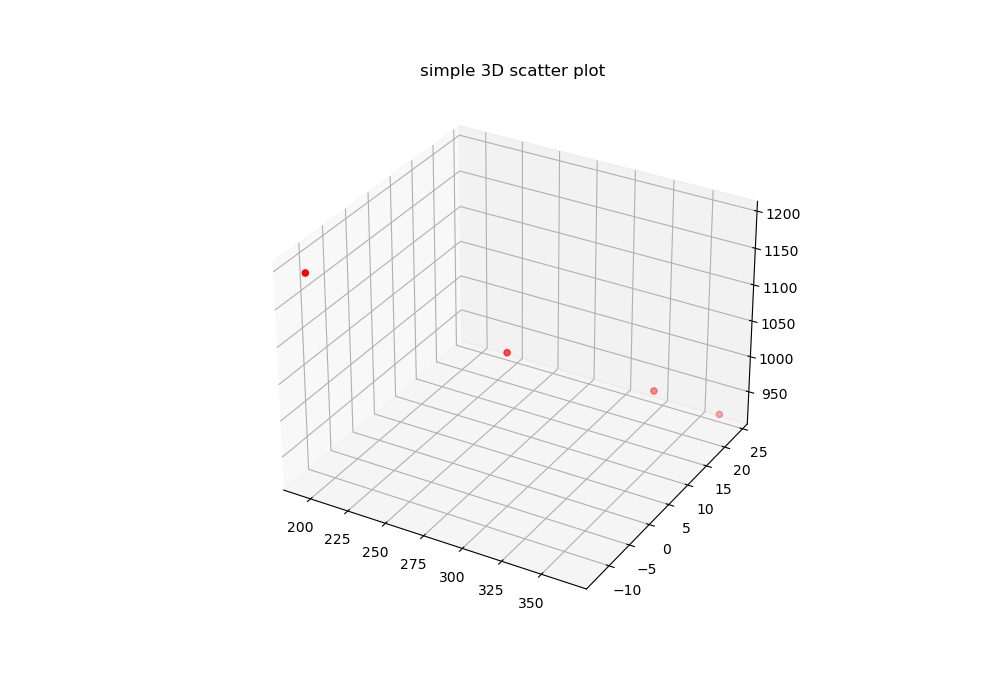

In [ ]:
# Import libraries
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Points
x = PC[:,0]
y = PC[:,1]
z = PC[:,2]

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "red")
plt.title("simple 3D scatter plot")

# show plot
plt.show()


In [ ]:
print(np.linalg.norm(PC[0]-PC[1]))
print(np.linalg.norm(PC[1]-PC[2]))
print(np.linalg.norm(PC[2]-PC[3]))
print(np.linalg.norm(PC[0]-PC[3]))

58.00647008533676
105.78077111796546
158.2831127365487
321.7890637885448
